# Diamonds Dataset Analysis
This assignment will allow you to demonstrate your ability to: 
1. make use of Python’s Pandas library; 
2. perform basic exploratory data analysis on a provided data set; 
3. create graphics using Matplotlib and Seaborn as part of your exploratory data analysis work; 
4. present your work in the form of a more “formal” research paper framework. 

The data set you will be using contains prices and other attributes of nearly 54,000 diamonds. The data set is provided 
via a separate file (‘diamonds.csv’) 

### A description of the attributes
1. price: 
price in US dollars (\$326--\$18,823)

2. carat: 
weight of the diamond (0.2--5.01)

3. cut: 
quality of the cut (Fair, Good, Very Good, Premium, Ideal)

4. color: 
diamond colour, from D (best) to J (worst)

5. clarity: 
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

6. x: 
length in mm (0--10.74)

7. y: 
width in mm (0--58.9)

8. z: 
depth in mm (0--31.8)

9. depth: 
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

10. table: 
width of top of diamond relative to widest point (43--95)

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

 ## Part 0: load the data
 ### 0.0 Upload the data file into online AIM 5001 GitHub repository 

In [180]:
# get url from raw csv address on github
url = 'https://raw.githubusercontent.com/JuJu-Ren/AIM-5001/main/diamonds.csv'
df=pd.read_csv(url)
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Part 1: Data Summary
### 1.1 Explain how many use cases your data set provides

In [149]:
# REMOVE UNWANTED COLUMN
df = df.drop('Unnamed: 0', axis = 1)
df.tail(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


see the factors above, there are all factors attributed to the diamond. Check the data relationship and the price is the main variable we are looking at. In another word, we are looking at the relationship between all the diamonds factors and diamond price. If all the attributes we have data here can perdict the price model.

### 1.2  attributes in each use case

we first need to see all types of data of the attributes, from the discription we know
the range, type of data the frame included. 
first we should divide the data into different category and then step in see the relationship between data group and plot the visualization graphs.
* we can see relationship between factors
* we can see the histogram of an individual factor
* check the statistical description and see the values

### 1.3 data types are for each of the attributes

In [150]:
df.shape

(53940, 10)

In [151]:
# Get information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


from the data info we can see the columns names, data number for Non-Null, and the data type for each attribute
###### Datatype and Attributes names
* Object: cut, color, clarity (3)
* Float64: carat, depth, table, x, y, z (6)
* Int64: price(1)

## Part 2: Exploratory Data Analysis (EDA) 
### 2.1 Provide summary statistics for each attribute

In [176]:
# find statistical description
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### 2.2 provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn
to choose from:
* histogram
* bar plot
* boxplot
* scatter plot
* line plot

After analyzing the data type, here are a few graphical analysis we can do to see more information from the data
Steps:
1. Histogram for numerical attributes: carat, depth, table, price, x, y, z
2. Bar graph with categorical factors

######  and then see if we need any additional analysis depending on the result
note the attributes meaning:
* carat: weight of the diamond (0.2--5.01)
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table: width of top of diamond relative to widest point (43--95)

### 2.2.1 Histogram for numerical attributes
carat, depth, table, price, x, y, z

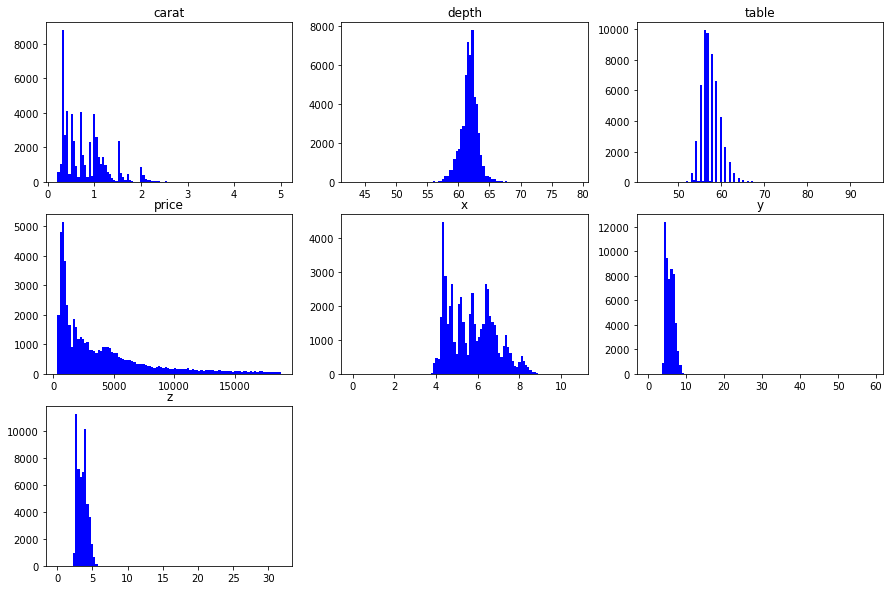

In [271]:
# MatplotLib
plt.figure(figsize = (15, 10))
for i, col in enumerate(list(df[["carat", "depth", "table","price","x","y","z"]].columns.values)):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[col], color = 'b', bins = 100)
    plt.title(col)

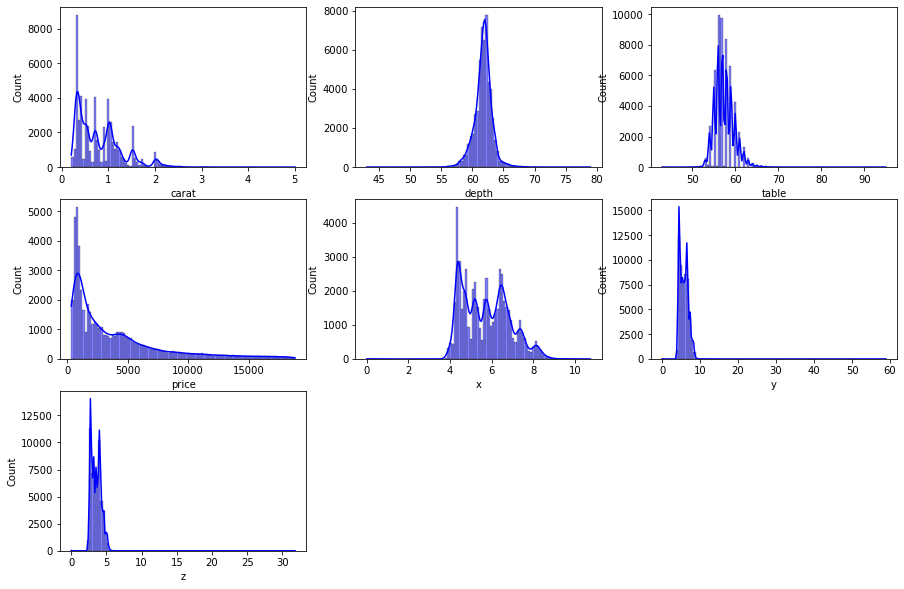

In [277]:
# Seaborn
plt.figure(figsize = (15, 10))
for i, col in enumerate(list(df[["carat", "depth", "table","price","x","y","z"]].columns.values)):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], color = 'b', kde = True, bins = 100)
#     plt.title(col)

#### Conclusion:
from the above graphs, we can see that the depth, abd table colums are close to normal distribution

### 2.2.2 Bar graph with categorical factors
cut, color, clarity

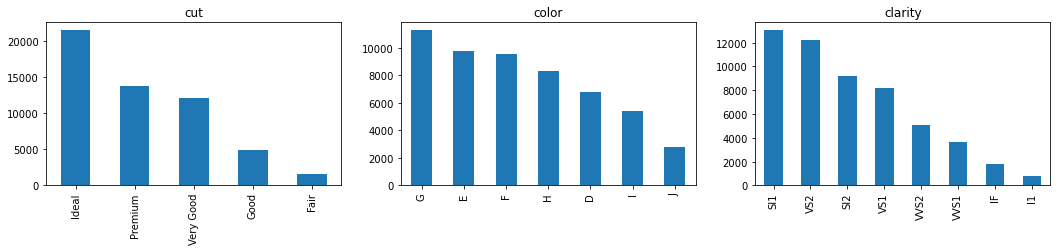

In [295]:
# Matplotlib
plt.figure(figsize = (18, 3))
for i, col in enumerate(list(df[["cut", "color", "clarity"]].columns.values)):
    plt.subplot(1, 3, i + 1)
    df[col].value_counts().plot(kind='bar',title=col)

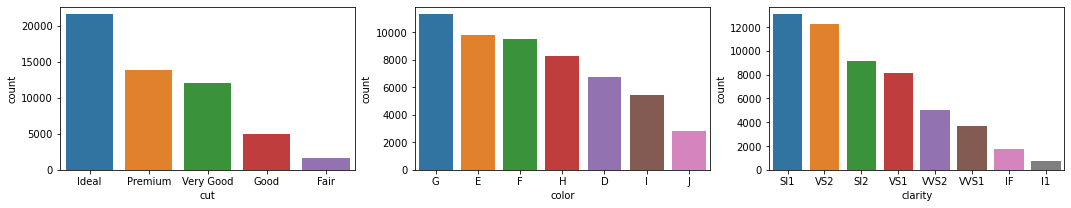

In [292]:
# Seaborn
plt.figure(figsize = (18, 3))
for i, col in enumerate(list(df[["cut", "color", "clarity"]].columns.values)):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=df[col], order=df[col].value_counts().index)

#### Conclusion:
We can see the graphs above showing that numbers of dimonds by cut, color and clarity is forming from up to down.

To define the perdiction equation of the Price

#### Further steps:
1. find out the factors relationship with eachother
2. find out the relationship between the parameters and the price

Depth and table has relationship with x, y, z from the parameter discription, we can start from there

### 2.2.3 Scatter plot between Depth and Table Relation

Text(0.5, 1.0, 'Depth and Table Relation')

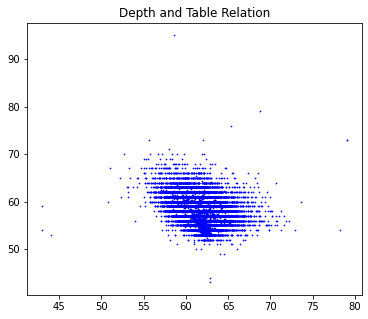

In [303]:
# Matplotlib
plt.figure(figsize=(6, 5))
plt.scatter(df['depth'], df['table'], edgecolor ="b", s = 0.5)
plt.title("Depth and Table Relation")

Text(0.5, 1.0, 'Depth and Table Relation')

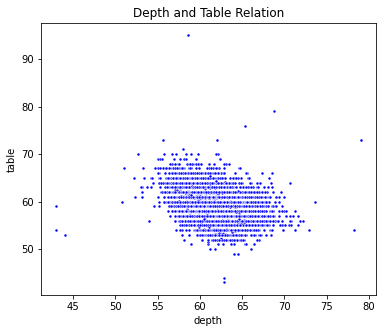

In [304]:
# Seaborn
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df['depth'], y=df['table'], color='b', data=df, marker=".")
plt.title('Depth and Table Relation')

There is no obvious linear trend relation depth and table relation

### 2.2.4 Scatter plot between numerical variables and Price Y
Numerical variables: carat depth table price x y z 

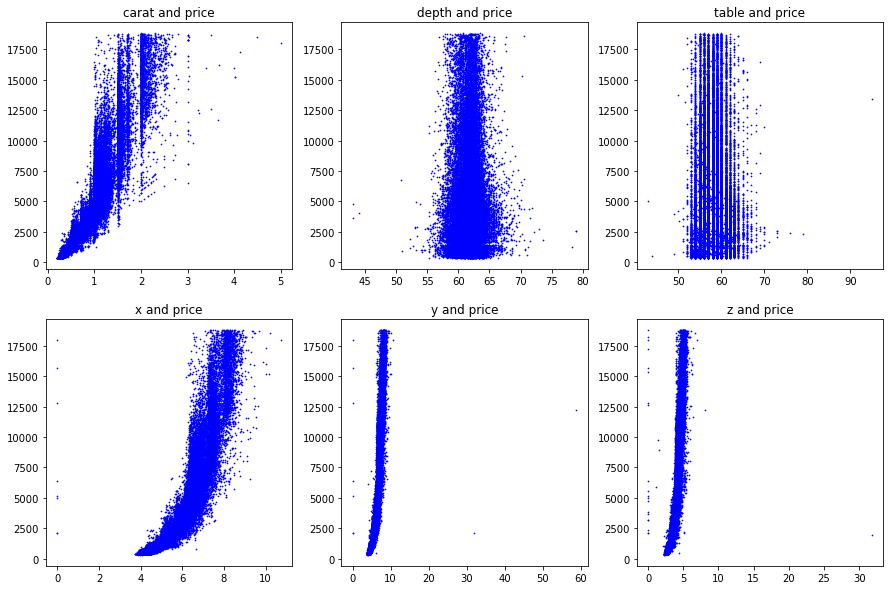

In [284]:
# Matplotlib
plt.figure(figsize = (15, 10))
for i, col in enumerate(list(df[["carat", "depth", "table","x","y","z"]].columns.values)):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[col], df['price'], edgecolor ="b", s = 0.5)
    plt.title(col+' and price')

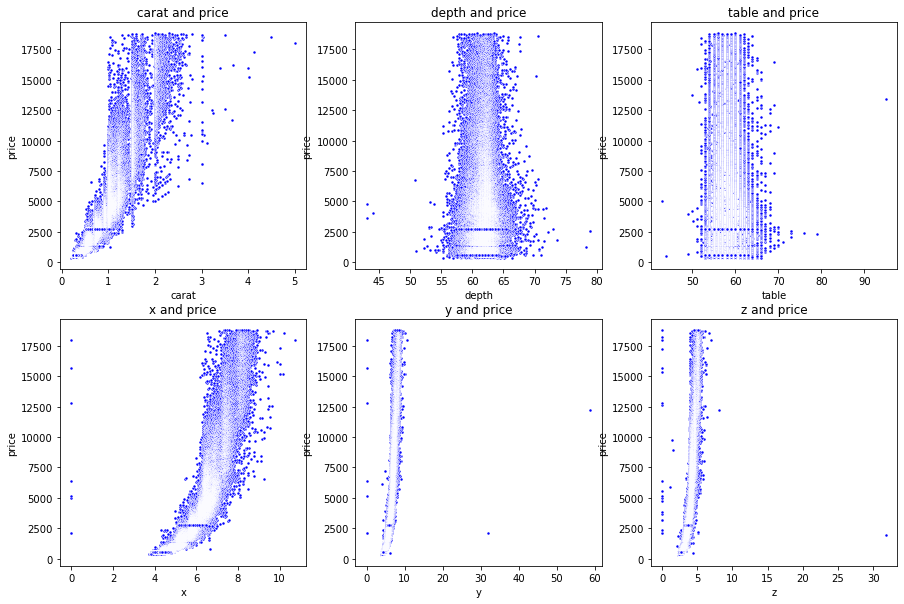

In [305]:
# Seaborn
plt.figure(figsize = (15, 10))
for i, col in enumerate(list(df[["carat", "depth", "table","x","y","z"]].columns.values)):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['price'], color='b', data=df, marker=".")
    plt.title(col+' and price')

cut color clarity is not only related with price also could related with size. 
<br> and we see from the graphs above, 
we see that price and carat is having a related tedency. 
### 2.2.5 Scatter plot between categorical variables and Price Y and carat
Ctegorical variables: cut  color clarity 

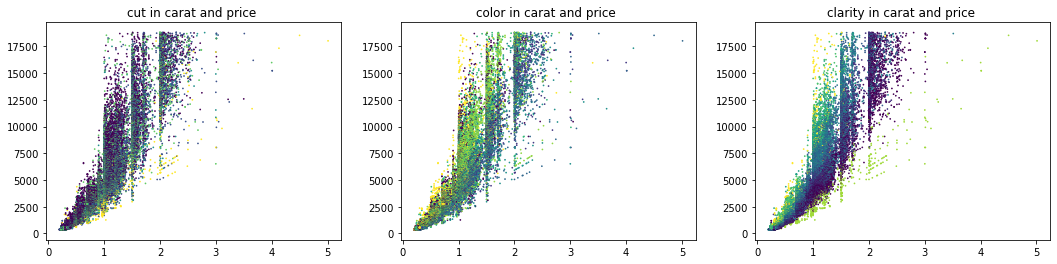

In [313]:
# Matplotlib
plt.figure(figsize = (18, 4))
for i, col in enumerate(list(df[["cut","color","clarity"]].columns.values)):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x = df['carat'], y = df['price'], c=pd.factorize(df[col])[0],s = 0.5)
    plt.title(col+' in carat and price ')

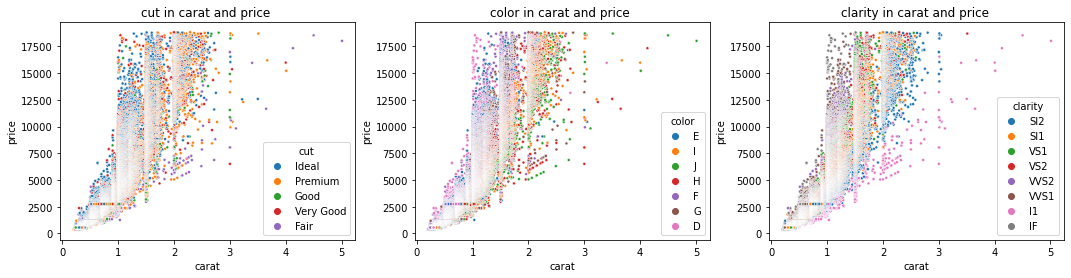

In [291]:
# Seaboen
plt.figure(figsize = (18, 4))
for i, col in enumerate(list(df[["cut","color","clarity"]].columns.values)):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data = df,x = 'carat', y = 'price', hue = col , marker=".",)
    plt.title(col+' in carat and price ')

## Part 3: Inferences 
### 3.1  What proportion of diamonds are between .30 and 1.08 carats?

In [158]:
value_c = pd.value_counts((df['carat'] >= 0.30) & (df['carat'] <= 1.08))[1]
value_all = df['carat'].shape[0]
prob = value_c/value_all
print('proportion of diamonds between .30 and 1.08 carats is:',f"{prob:.4%}")

proportion of diamonds between .30 and 1.08 carats is: 74.6830%


### 3.2 How many of the diamonds have equal x and y dimensions?

In [159]:
# To show the details and To check the results
df[df['x'] == df['y']]

,carat,cut,color,clarity,depth,table,price,x,y,z
3397,0.30,Ideal,H,VVS2,62.5,54.0,567,4.30,4.30,2.70
10055,0.27,Very Good,F,VVS1,62.0,55.0,591,4.16,4.16,2.59
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
16516,1.00,Premium,E,VS2,60.0,60.0,6600,6.43,6.43,3.89
16851,1.00,Premium,E,VS2,60.0,60.0,6720,6.43,6.43,3.89
17368,1.22,Premium,G,SI2,62.4,61.0,6969,6.79,6.79,4.23
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.00
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.00


As we can observe from the dataframe, there are some missing numbers of x y z in the dataframe
<br> Because we dont count the diamonds that have x and y dimentions of zeros, we nened to clean the data and not counting those numbers in

To remove x = 0.0, y = 0.0, z = 0.0, depth = 0.0, because a real diamond is a solid crystal and it has three non-zero dimensions

In [160]:
dv = df.drop(df[df['x'] == 0.0].index)
dv = dv.drop(dv[dv['y'] == 0.0].index)
dv = dv.drop(dv[dv['z'] == 0.0].index)
dv.shape

(53920, 10)

In [161]:
dv[dv['x'] == dv['y']]

,carat,cut,color,clarity,depth,table,price,x,y,z
3397,0.30,Ideal,H,VVS2,62.5,54.0,567,4.30,4.30,2.70
10055,0.27,Very Good,F,VVS1,62.0,55.0,591,4.16,4.16,2.59
16516,1.00,Premium,E,VS2,60.0,60.0,6600,6.43,6.43,3.89
16851,1.00,Premium,E,VS2,60.0,60.0,6720,6.43,6.43,3.89
17368,1.22,Premium,G,SI2,62.4,61.0,6969,6.79,6.79,4.23
34302,0.32,Ideal,D,VVS2,62.1,54.0,858,4.40,4.40,2.74
40016,0.42,Ideal,H,VVS1,62.8,57.0,1108,4.79,4.79,3.01
41855,0.61,Premium,G,SI1,60.8,60.0,1255,5.42,5.42,3.31
42127,0.48,Ideal,F,VS2,62.4,54.0,1279,5.03,5.03,3.15
43490,0.51,Premium,F,SI1,61.4,59.0,1421,5.13,5.13,3.16


In [162]:
# To get the number of x == y
pd.value_counts(dv['x'] == dv['y'])[1]

10

### 3.3 How many of the diamonds have a carat value that is less than the mean carat value?
carat: weight of the diamond (0.2--5.01)
##### steps:
1. find out the mean carat value
2. clean the data to carat data in the range of 0.2-0.5
3. count the diamonds amount

In [163]:
# To get mean of carat
df['carat'].mean()

0.7979397478679852

In [164]:
# clean the carate data, only leave the data in range of 0.2-0.5
pd.value_counts((df['carat'] < df['carat'].mean()) & (df['carat'] >= 0.2) & (df['carat'] <= 5.01) )[1]

31127

### 3.4 How many diamonds have a Premium cut or better? 

In [165]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

We see the class of the "cut" which is premium or better includes "Ideal" and "Premium"

In [166]:
# To calculate the number of Premium cut or Ideal cut
print(pd.value_counts((df['cut'] == 'Premium') | (df['cut'] == 'Ideal'))[1],'diamonds have a Premium cut or better')

35342 diamonds have a Premium cut or better


### 3.5  Which diamond has the highest price per carat? What is its value?

In [167]:
df[df['carat'] == 0]

,carat,cut,color,clarity,depth,table,price,x,y,z


we noticed there is no 0 carat value. so we can start the calculation

In [181]:
dv = df.copy(deep=True)
dv['Price per Carat'] = dv['price'] / dv['carat']
dv.sort_values(by = 'Price per Carat', ascending=False).head(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Price per Carat
27635,27636,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01,17828.846154


###  3.6 Plot boxplot of the diamond price and cut value
<br> Using both Matplolib and Seaborn, make boxplots of the diamond price for each distinct cut value and 
discuss any conclusions you can draw from the appearance of the boxplots

In [195]:
df[['cut','price']].groupby('cut').describe()

price                                                             \
             count         mean          std    min      25%     50%      75%   
cut                                                                             
Fair        1610.0  4358.757764  3560.386612  337.0  2050.25  3282.0  5205.50   
Good        4906.0  3928.864452  3681.589584  327.0  1145.00  3050.5  5028.00   
Ideal      21551.0  3457.541970  3808.401172  326.0   878.00  1810.0  4678.50   
Premium    13791.0  4584.257704  4349.204961  326.0  1046.00  3185.0  6296.00   
Very Good  12082.0  3981.759891  3935.862161  336.0   912.00  2648.0  5372.75   

                    
               max  
cut                 
Fair       18574.0  
Good       18788.0  
Ideal      18806.0  
Premium    18823.0  
Very Good  18818.0

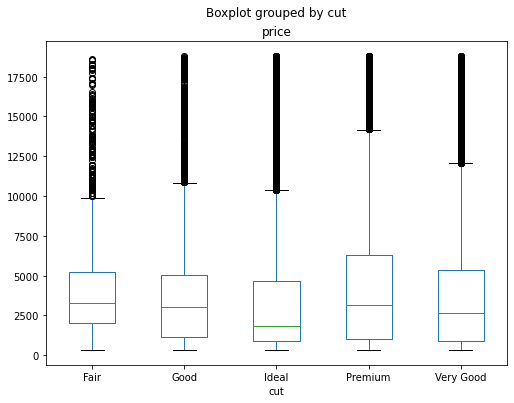

In [219]:
# matplotlib
fig, ax = plt.subplots(figsize=(8,6))
df.boxplot("price", by="cut", ax=ax, grid=False)
plt.show()

<AxesSubplot:xlabel='cut', ylabel='price'>

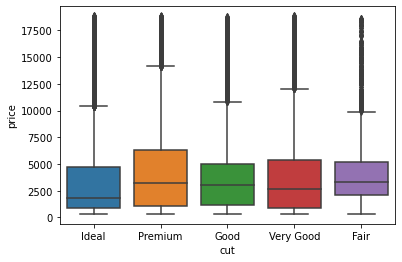

In [220]:
# Seaborn
sns.boxplot(x='cut', y='price', data=df)

### 3.7 scatter plot of price vs. carat
Using both Matplolib and Seaborn, make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?


In [222]:
df[['carat', 'price']].describe()

,carat,price
count,53940.000000,53940.000000
mean,0.797940,3932.799722
std,0.474011,3989.439738
min,0.200000,326.000000
25%,0.400000,950.000000
50%,0.700000,2401.000000
75%,1.040000,5324.250000
max,5.010000,18823.000000


Text(0.5, 1.0, 'price vs. carat')

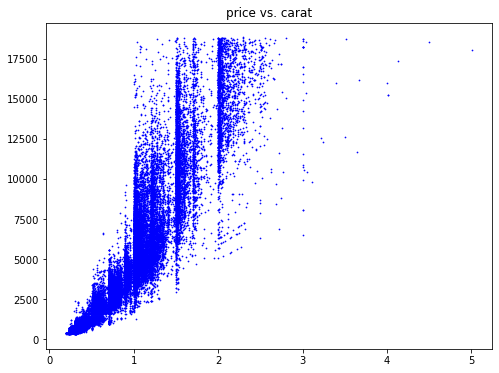

In [246]:
# Matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(df['carat'], df['price'],
            edgecolor ="b",
            s = 0.5
           )
plt.title("price vs. carat")

Text(0.5, 1.0, 'price vs. carat')

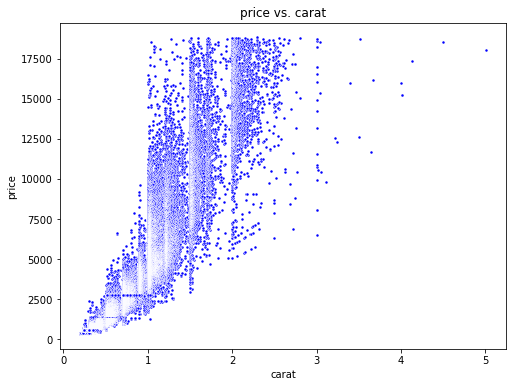

In [286]:
# Seaborn 
plt.figure(figsize=(8, 6))
sns.scatterplot(data = df, x =df['carat'], y =df['price'],
                color='b', marker=".",
               )
plt.title("price vs. carat")

## Part 4: Conclusion
– A brief, concise narrative explaining your conclusions.


<br> from all the analysis above. We can see the analysis explore the data relationship step by step:
* The bar plot graph clearly shows that the higher the rank of the diamond cut and clarity(fair being the lowest and ideal being the highest), the higher its frequency within the data set.
* The median prices of the 5 cut ranks are close to one another, with the Ideal cut being the lowest one, as can be seen by looking at each of the boxplots and the final, summing boxplot. A considerable number of outliers in the data can also be found, leading us to the conclusion that there are other variables in the dataset that may have a greater impact than just the rank of the diamond cut.
* from the plot we see the categorical variables distribution with price and cater, the color distribution is not very clear, can not tell any clear divition or correlation betweeen different level of categorical variables and price
* we can see there is a relationship between price and carat. The price rises in proportion to the size of the carat. However, it's important to remember that pricing variations increase with carat size. In other words, larger diamonds have a wider variety of prices. This characteristic makes it harder for us to make precise price predictions.

## References

<br> https://seaborn.pydata.org/generated/seaborn.scatterplot.html
<br> https://seaborn.pydata.org/generated/seaborn.boxplot.html
<br> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
<br> https://matplotlib.org/stable/gallery/statistics/hist.html